# Лабораторная работа 4
Задача восстановления зависимостей. Манипулирование признаками. Сокращение размерности.

## Инициализация

### Скачивание пакетов

In [ ]:
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install category_encoders

### Импорт пакетов

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import warnings

### Убираем предупреждения

In [9]:
warnings.filterwarnings('ignore')

## Часть 1

### Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные).

In [68]:
# UCI Adult dataset (target ==> income)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adult_data = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Временно убрать категориальные признаки. Построить линейную регрессию.

In [71]:
# Разделение данных на числовые и категориальные признаки
numerical_features = adult_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = adult_data.select_dtypes(include=['object']).columns

# Разделение данных на обучающий и тестовый наборы
X = adult_data.drop(categorical_features, axis=1)
y = (adult_data['income'] == '>50K').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
linear_predictions = linear_model.predict(X_test)

## Часть 2

### Построить решение методом бустинга

In [72]:
# Создаем и обучаем модель градиентного бустинга
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
boosting_predictions = boosting_model.predict(X_test)

### Сравнить с линейной регрессией.

In [73]:
# Оцениваем точность модели линейной регрессии
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

# Оцениваем точность модели градиентного бустинга
boosting_mse = mean_squared_error(y_test, boosting_predictions)
print(f'Gradient Boosting Mean Squared Error: {boosting_mse}')

Linear Regression Mean Squared Error: 0.13979141826004823
Gradient Boosting Mean Squared Error: 0.11073767290727846


Среднеквадратичная ошибка, при использовании модели градиентного бустинга, ниже, следовательно эта модель лучше справилась с задачей.

## Часть 3

### Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть).

#### Теория

##### Краткое сравнение One Hot и Target Encoding'ов

**One Hot Encoding (OHE):**
- **Описание:** OHE представляет собой метод преобразования категориальных переменных в бинарные векторы. Для каждого уникального значения категории создается новый бинарный признак. Если в категориальном столбце есть $ n $ уникальных значений, OHE создаст $ n $ новых бинарных признаков.
- **Пример:** Если у вас есть категориальный признак "Цвет" с уникальными значениями "Красный", "Синий", "Зеленый", то OHE создаст три новых бинарных признака, представляющих каждый из цветов.

**Target Encoding (Mean Encoding):**
- **Описание:** Target Encoding используется для преобразования категориальных переменных в числовые значения на основе среднего значения целевой переменной (или другой числовой переменной) для каждой категории. Этот метод учитывает взаимосвязь между категориальным признаком и целевой переменной.
- **Пример:** Если у вас есть категориальный признак "Город" и целевая переменная "Средний доход", то Target Encoding для "Города" будет представлять собой средний доход для каждого уникального города.

#### Код

In [74]:
# One Hot Encoding
one_hot_encoder = OneHotEncoder(cols=categorical_features)
data_one_hot = one_hot_encoder.fit_transform(adult_data)
display(data_one_hot.head())

# Target Encoding
target_encoder = TargetEncoder(cols=categorical_features)
data_target_encoded = target_encoder.fit_transform(adult_data, y)
display(data_target_encoded.head())

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42,income_1,income_2
0,39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245835,0.0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245835,0.0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245835,0.0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245835,0.0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0.12388,0.109461,0,0,40,0.263146,0.0


### Сравнить точность.

In [75]:
# One Hot Encoding
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(
    data_one_hot.drop(['income_1', 'income_2'], axis=1), y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_one_hot, y_train_one_hot)

linear_predictions = linear_model.predict(X_test_one_hot)

linear_mse = mean_squared_error(y_test_one_hot, linear_predictions)
print(f'One Hot Encoding Mean Squared Error: {linear_mse}')

# Target Encoding
X_train_tar_enc, X_test_tar_enc, y_train_tar_enc, y_test_tar_enc = train_test_split(
    data_target_encoded.drop(['income'], axis=1), y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_tar_enc, y_train_tar_enc)

linear_predictions = linear_model.predict(X_test_tar_enc)

linear_mse = mean_squared_error(y_test_tar_enc, linear_predictions)
print(f'Target Encoding Mean Squared Error: {linear_mse}')

One Hot Encoding Mean Squared Error: 0.11577397152989906
Target Encoding Mean Squared Error: 0.11682141179895879


Среднеквадратичная ошибка ниже при использовании One Hot Encoding

## Часть 4

### Визуализировать объекты в пространстве главных компонент.

#### Теория

**Пространство главных компонент (Principal Component Space)** - это пространство, в котором данные представлены в виде проекций на главные компоненты.

**Метод главных компонент (Principal Component Analysis, PCA)** — это статистический метод, используемый для уменьшения размерности данных. Он позволяет преобразовать множество коррелированных признаков в меньшее количество некоррелированных переменных, называемых главными компонентами.

***Корреляция** - это статистическая мера, описывающая степень взаимосвязи между двумя переменными. Если значения одной переменной изменяются, корреляция описывает, насколько и как изменяются значения другой переменной.*

$$ Корреляция(X,Y)= \frac{Ковариация(X,Y)} {σ_X⋅σ_Y} $$

*Корреляция измеряется коэффициентом корреляции, который принимает значения от -1 до 1:*

- *1: Положительная полная корреляция. Когда одна переменная растет, другая также растет.*
- *0: Отсутствие корреляции. Изменения в одной переменной не связаны с изменениями в другой переменной.*
- *-1: Отрицательная полная корреляция. Когда одна переменная растет, другая уменьшается.*

**Основные шаги метода главных компонент:**

1. **Центрирование данных:** Вычитаем среднее значение каждого признака из соответствующих значений в наборе данных. Это делается для того, чтобы обеспечить центрирование данных вокруг нуля.

2. **Вычисление ковариационной матрицы:** Ковариационная матрица показывает, какие компоненты данных коррелируют друг с другом. В PCA стремятся максимизировать дисперсию (или ковариацию) данных.

3. **Вычисление собственных векторов и собственных значений:** Собственные векторы и собственные значения ковариационной матрицы являются ключевыми элементами PCA. Собственные векторы указывают направления максимальной дисперсии в данных, а собственные значения измеряют величину этой дисперсии вдоль соответствующих направлений.

4. **Сортировка собственных векторов:** Собственные векторы сортируются в порядке убывания собственных значений. Это гарантирует, что главные компоненты будут упорядочены по убыванию важности.

5. **Выбор главных компонент:** Выбираются первые k (где k меньше, чем исходное количество признаков) собственных векторов, соответствующих k наибольшим собственным значениям. Эти собственные векторы формируют пространство главных компонент.

6. **Проекция данных на пространство главных компонент:** Исходные данные умножаются на матрицу, составленную из первых k собственных векторов. Получившаяся проекция данных находится в пространстве главных компонент.

#### Код

На это раз возьмём другую таблицу с меньшим количеством признаков для наглядности

In [125]:
# Загрузка датасета Wine
wine = load_wine()

# Преобразование в DataFrame
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**StandardScaler** - это метод стандартизации данных, который предоставляется библиотекой scikit-learn. Стандартизация является одним из видов преобразования данных, которое призвано обеспечить, чтобы признаки имели среднее значение 0 и стандартное отклонение 1.

**StandardScaler** преобразует каждый признак путем вычитания среднего значения признака и деления на стандартное отклонение этого признака. Формула стандартизации для каждого признака выглядит следующим образом:

$$ x′ = \frac {x - mean} {std} $$

Где:
- **x′** - стандартизированное значение признака,
- **x** - исходное значение признака,
- **mean** - среднее значение признака,
- **std** - стандартное отклонение признака.

Применение **StandardScaler** особенно полезно, когда признаки в исходных данных имеют различные диапазоны или масштабы. Это помогает алгоритмам машинного обучения лучше работать, так как они чувствительны к масштабу данных.

In [126]:
# Центрирование данных
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df.iloc[:, :-1])

In [132]:
# Количество главных компонент
components = 2

# Применение PCA
pca = PCA(n_components=components)
principal_components = pca.fit_transform(wine_scaled)

# Создание DataFrame с главными компонентами
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(components)])

# Добавление меток классов
pc_df['target'] = wine_df['target']

# Вот так выглядят наши данные после примерения PCA
display(pc_df)

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


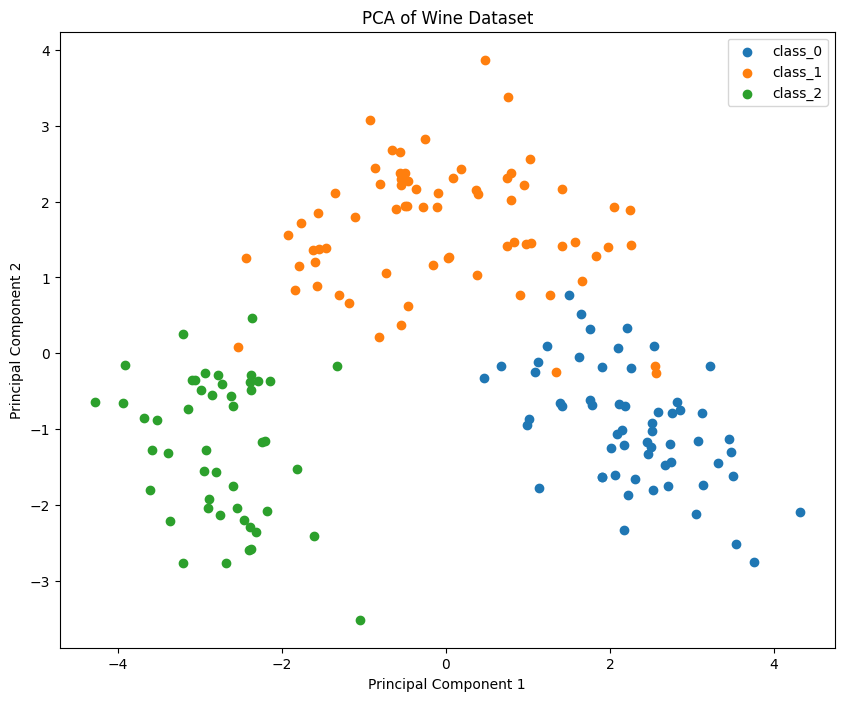

In [133]:
# Визуализация в пространстве главных компонент
plt.figure(figsize=(10, 8))
for label in wine.target_names:
    plt.scatter(pc_df.loc[pc_df['target'] == wine.target_names.tolist().index(label), 'PC1'],
                pc_df.loc[pc_df['target'] == wine.target_names.tolist().index(label), 'PC2'],
                label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()